<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 21**

## **Contenido**

- <a href="#arb"> Árboles de decisión</a><br>
- <a href="#ens"> Métodos de ensamble</a><br>




<p><a name="arb"></a></p>

# **Árboles de decisión**

Los árboles de decisión son algoritmos que pueden ser usados tanto para clasificación como para regresión. Consisten en una secuencia de preguntas si/sino (if/else) que llevan a la decisión final.

Suponga que se deseamos clasificar los siguientes cuatro animales: Águila (Hawk), Pingüino (Penguin), Delfín (Dolphin) y Oso (Bear), donde tenemos información sobre si el animal tiene plumas (feathers), Aletas (fins), si puede nadar (swim) o Volar (fly). 

- Puede volar.
- tiene plumas.
- tiene aletas.


<p><img alt="Colaboratory logo" height="400px" src="https://i.imgur.com/4Zn7clc.jpg" align="center" hspace="10px" vspace="0px"></p>

Podríamos construir un árbol con la siguiente forma

<p><img alt="Colaboratory logo" height="300px" src="https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s10/desTreeAnimals.png" align="center" hspace="10px" vspace="0px"></p>

En esta ilustración, cada nodo del árbol representa una pregunta o un nodo terminal que contiene la respuesta. Cada nodo del digrama anterior es llamado hoja (*leaf*). La primer pregunta define lo que se conoce como el *nodo raíz*.

Tan solo haciendo tres preguntas, en dos niveles, es posible identificar a que animal corresponde una instancia particular. En el lenguaje del ML podemos decir entonces que tenemos cuatro clases: Águila, Pingüino, Delfín y Oso, y son necesarias las siguientes tres características para poder hacer la calsificación: tener plumas, poder volar y tener aletas. 

Note que podemos construir diferentes árboles, dependiendo de la pregunta inicial que hagamos. En lugar de construir estos modelos a mano, podemos aprenderlos a partir de los datos mediante el aprendizaje supervisado.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

Veamos el proceso de creación de un árbol de decisión para el conjunto de datos Iris:


In [ ]:
data = sns.load_dataset("iris") 

X = data[["petal_length","petal_width"]]
y = data["species"].map({"setosa":1, "versicolor":2, "virginica":3})


In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


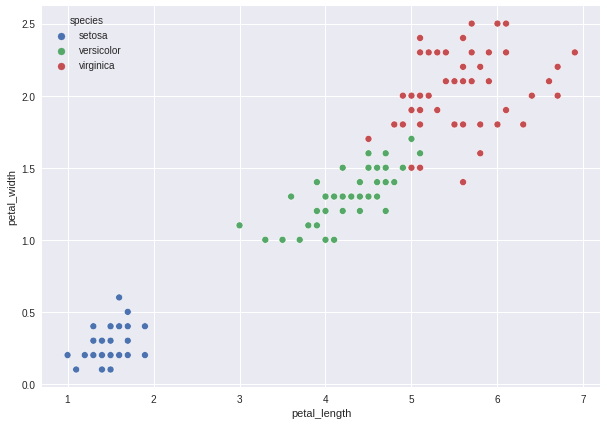

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = data, x = "petal_length", y = "petal_width", hue='species');

Aprender un árbol de decisiones significa aprender la secuencia de preguntas si/si no que nos lleva a la respuesta verdadera más rápidamente. En el contexto del ML, estas preguntas se denominan *tests*. 

Por lo general, los datos no vienen en forma de características binarias sí/no como en el ejemplo inicial de la clasificación de los animales, sino que se representan como características continuas como el `petal_length` en el conjunto de datos Iris. Los *test* que se utilizan en datos continuos son de la forma "¿La característica $x$ es mayor/menor que el valor $y$?"

Para construir un árbol, el algoritmo busca entre todos los *tests* posibles y encuentra el que es más informativo sobre la variable objetivo.

El proceso de ajustar un árbol de decisiones a nuestros datos se puede realizar en Scikit-Learn con el estimador `DecisionTreeClassifier` del submódulo `tree`. Con el hiperparámetro `max_depth` podemos especificar el número de niveles o la profundidad del árbol. Comencemos con un árbol de un nivel:




In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_clf = DecisionTreeClassifier(random_state=42, max_depth=1).fit(X,y)

Podemos visualizar el árbol con la función `plot_tree` del mismo submódulo `tree`

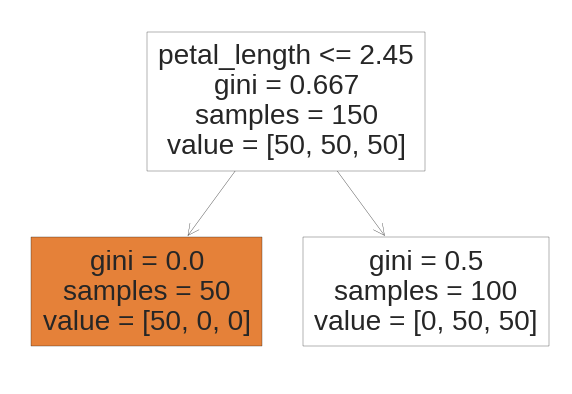

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt_clf, feature_names=["petal_length","petal_width"], filled= True);

Note que en este caso el primer *test* que se elige es: ¿Es la longitud del pétalo menor o igual a 2.45? Al nodo de la izquierda se van las instancias que responden positivamente al *test* y al nodo de la derecha las que responden negativamente. Esto representa separar nuestras instancias verticalmente en `petal_lenght=2.45`

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


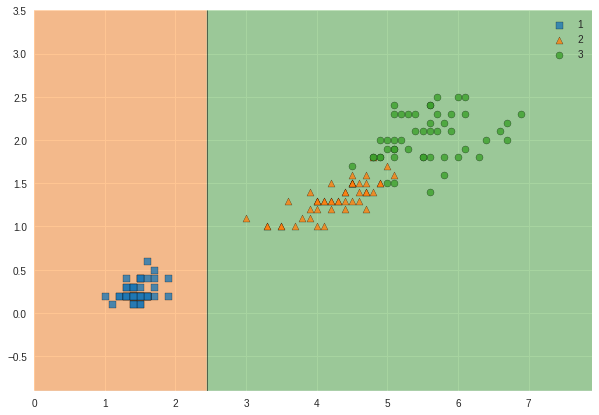

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,7))
plot_decision_regions(X.values, y.values, dt_clf);

Note que hemos separado las instancias en dos clases. Podemos construir un modelo más preciso repitiendo el proceso de buscar el mejor *test* en ambas regiones:


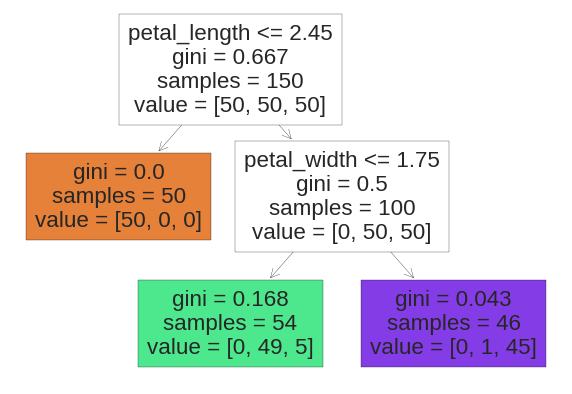

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=2).fit(X,y)
plt.figure(figsize=(10,7))
plot_tree(dt_clf, feature_names=["petal_length","petal_width"], filled= True);

In [ ]:
print(1 - (49/54) ** 2 - (5/54) ** 2)
print(1 - (1/46) ** 2 - (45/46) ** 2)

0.1680384087791495
0.04253308128544431


Vemos que el separamiento más informativo en la región de la derecha se da para un valor de `petal_width = 1.75`:

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


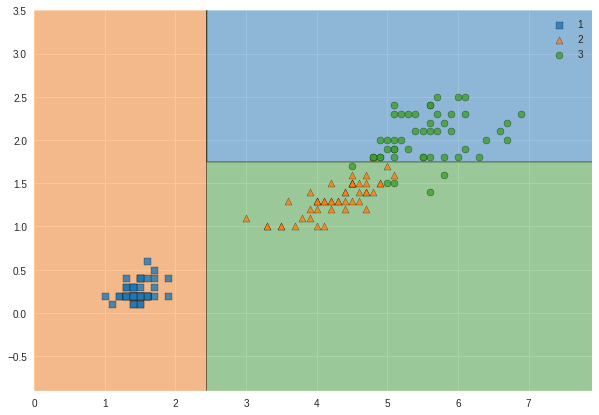

In [ ]:
plt.figure(figsize=(10,7))
plot_decision_regions(X.values, y.values, dt_clf);

Note que en este caso el modelo separa de mejor manera las instancias, pero todavía hay clases 3 en la región 2. Podemos seguir en este proceso de forma iterativa para construir un modelo más complejo: 

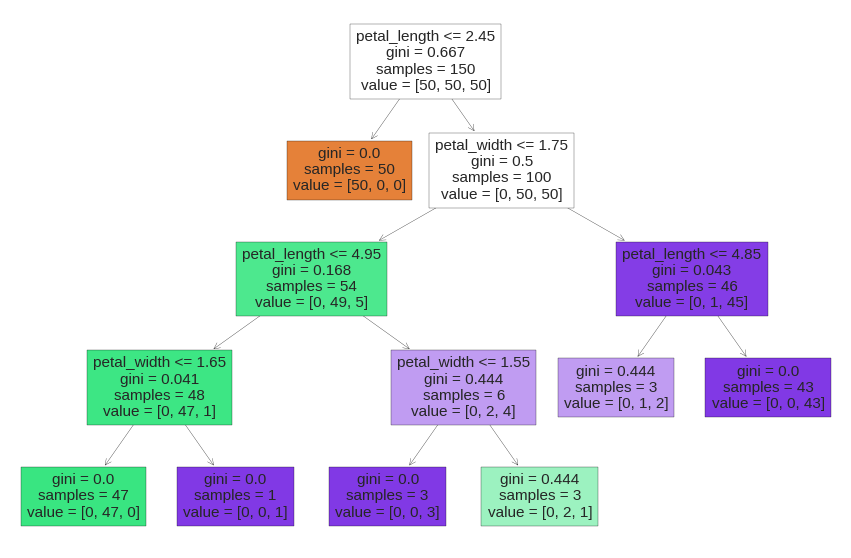

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=4,).fit(X,y)
plt.figure(figsize=(15,10))
plot_tree(dt_clf, feature_names=["petal_length","petal_width"], filled= True);

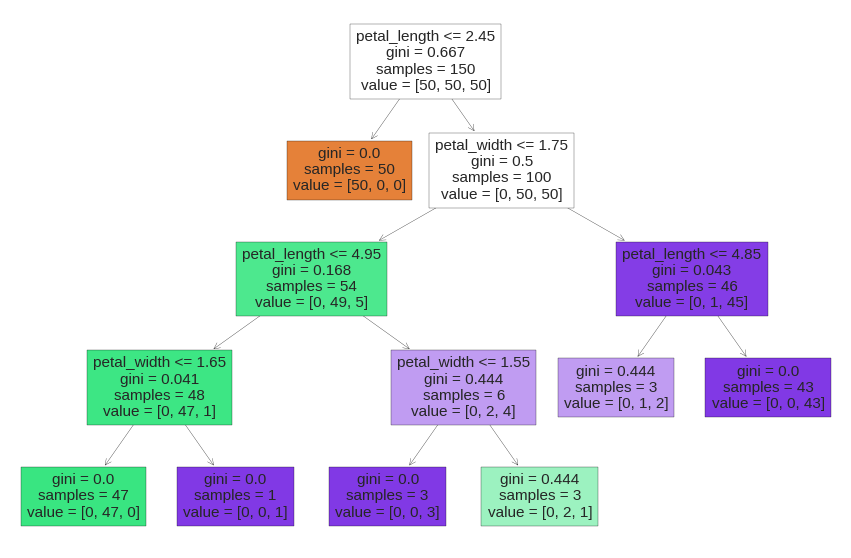

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=4).fit(X,y)
plt.figure(figsize=(15,10))
plot_tree(dt_clf, feature_names=["petal_length","petal_width"], filled= True);

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


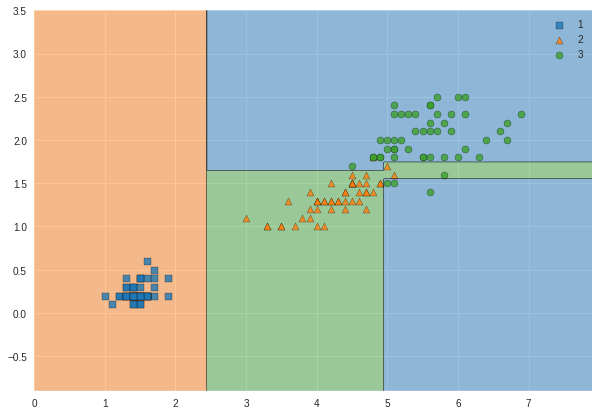

In [ ]:
plt.figure(figsize=(10,7))
plot_decision_regions(X.values, y.values, dt_clf);

La partición recursiva de los datos se repite hasta que cada región de la partición (cada hoja del árbol de decisión) solo contiene un único valor objetivo (una sola clase):


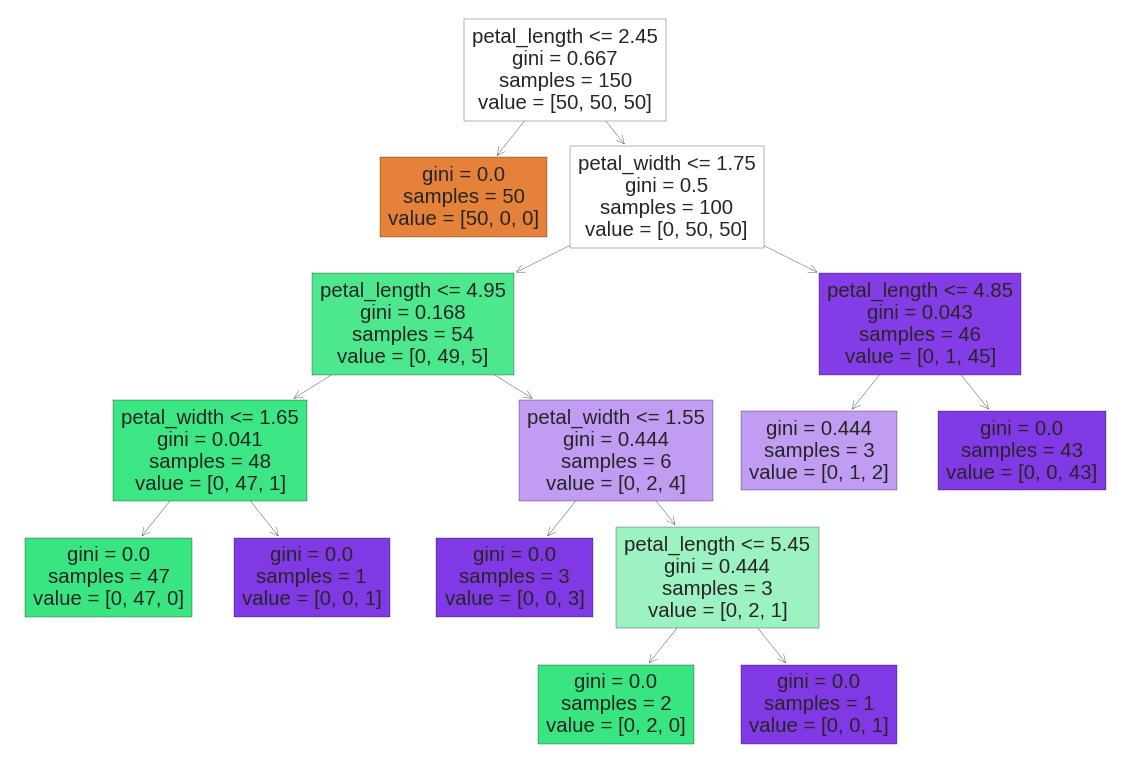

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42).fit(X,y)
plt.figure(figsize=(20,14))
plot_tree(dt_clf, feature_names=["petal_length","petal_width"], filled= True);

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


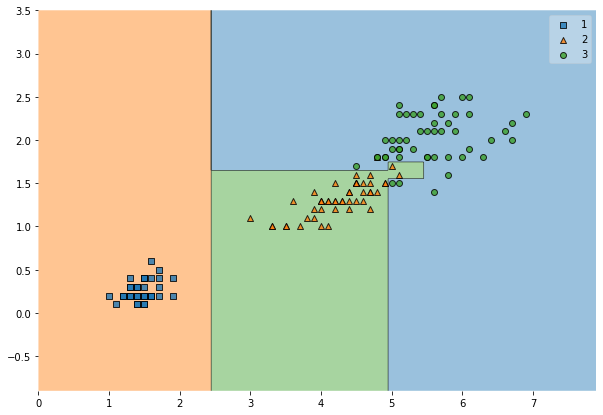

In [ ]:
plt.figure(figsize=(10,7))
plot_decision_regions(X.values, y.values, dt_clf);

Un nodo del árbol que contenga únicamente instancias de una clase se conoce como un *nodo puro* u *hoja pura*

Por lo general, la construcción de un árbol de decisión tal que todas las hojas sean puras conduce a modelos que son muy complejos y que sobreajustan los datos. La presencia de hojas puras significa que un árbol es 100 % preciso en el conjunto de entrenamiento.

Hay dos estrategias comunes para evitar el sobreajuste: detener la creación del árbol en una etapa temprana (llamado pre-podado o *pre-pruning*), o construir el árbol y luego eliminar o colapsar los nodos que contienen poca información (también llamado pos-podado o *post-pruning*).

Los posibles criterios para el pre-podado incluyen limitar la profundidad máxima del árbol (`max_depth`), limitar el número máximo de hojas (`max_leaf_nodes`) o requerir un número mínimo de instancias en un nodo para seguir particionandolo (`min_samples_split`). Sklearn sólo permite implementar el pre-podado (mediante los hiperparámetros del estimador) y no el pos-podado.

Podemos realizar una curva de validación para el hiperparámetro `max_depth` para ver cuál es la profundidad óptima del árbol de manera que no sobreajustemos los datos:




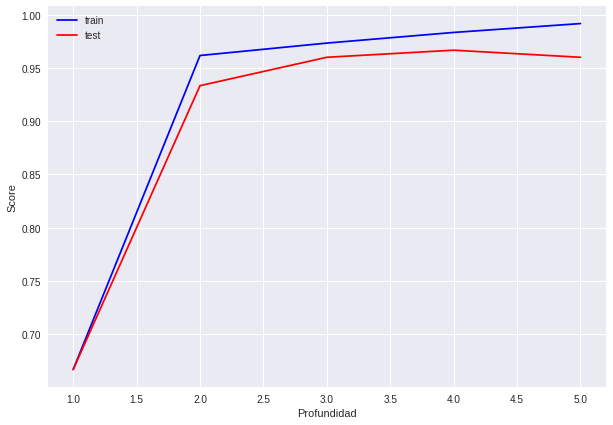

In [ ]:
from sklearn.model_selection import validation_curve

train, test = validation_curve(dt_clf, X, y,
                               param_name = 'max_depth',
                               param_range = range(1,6), cv = 5)

plt.figure(figsize=(10,7))
plt.plot(range(1, 6), np.mean(train, axis = 1), "b", label = "train")
plt.plot(range(1, 6), np.mean(test, axis = 1), "r", label = "test")
plt.xlabel('Profundidad')
plt.ylabel('Score')
plt.legend();

**importancia de las característica**

En lugar de mirar el árbol completo, existen algunas propiedades útiles que podemos derivar para resumir el funcionamiento del árbol. El resumen más utilizado es la importancia de las características, que califica la importancia de cada característica para la decisión que toma un árbol. Es un número entre 0 y 1 para cada característica, donde 0 significa "no se usa en absoluto" y 1 significa "predice perfectamente el objetivo".


In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Esta información la podemos encontrar en el atributo `feature_importances_`

In [ ]:
X = data.drop(columns='species')

dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3).fit(X, y)

print("Característica", "\t", "Importancia")
for feature, importancia in zip(data.columns, dt_clf.feature_importances_):
  print(feature, "\t", importancia)

Característica 	 Importancia
sepal_length 	 0.0
sepal_width 	 0.0
petal_length 	 0.5856155514031495
petal_width 	 0.4143844485968506


Sin embargo, si una característica tiene una `feature_importance` baja, no significa que esta característica no sea informativa. Solo significa que la característica no fue seleccionada por el árbol, probablemente porque otra característica codifica la misma información. A diferencia de los coeficientes en los modelos lineales, la importancia de las características son siempre positivas y no codifican qué característica es indicativa de una clase particular.



Ahora, ¿qué criterio cuantitativo utiliza el algoritmo para construir el árbol?

Scikit-Learn utiliza el algoritmo del árbol de clasificación (CART) para entrenar árboles de decisión. La idea es simple: el algoritmo primero divide el conjunto de entrenamiento en dos subconjuntos usando una sola característica $k$ y un umbral $t_k$. ¿Cómo elige $k$ y $t_k$? Busca el par $(k, t_k)$ que produce los subconjuntos más puros (árboles con hojas más puras). La función de costo que el algoritmo intenta minimizar está dada por

* **Función de costo (CART)**

$$J(k, t_k) = \frac{m_i}{m} G_i + \frac{m_d}{m} G_d$$


* **Gini**:

$$G = 1 - \sum_k P_{i,k}^2$$


Donde $P_{i,k}$ es la razón de las clases $k$ entre las instancias en el nodo $i$-ésimo, $t_k$  es el umbral de decisión y $m_{i,d}$ el número de instancias en el nodo izquierdo/derecho.

En las visualizaciones que hemos hecho de los árboles aparece explícitamente el valor de $G$ asociado a cada nodo. Alternativamente podríamos utilizar otra medida cuantitativa conocida como la *entropia*, que podemos definir en el estimador utilizando el hiperparámetro `criterion=entropy`. Ambos criterios dan resultados muy similares. El *gini* suele ser más eficiente, aunque la entropía suele arrojar árboles más simétricos.




El problema principal con los árboles de decisión, a parte de su tendencia a sobreajustar los datos de entrenamiento, es que estos son muy sensibles a variaciones en los datos de entrenamiento, lo que hace que estos modelos sean muy inestables. Esto lo podemos ver si realizamos una validación cruzada:

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(dt_clf, X, y, cv = 7)

array([0.95454545, 1.        , 0.90909091, 0.9047619 , 0.95238095,
       0.95238095, 1.        ])

En conclusion:

* **Ventajas:**
  * Fácil de usar e interpretar.
  * Poderoso
  * Versatil

* **Desventajas:**
  * Resultados con alta varianza (sobreajuste)
  * Inestable (alta sensibilidad a los datos de entrenamiento)

<p><a name="ens"></a></p>

# **Métodos de ensamble**

Los métodos de ensamble son modelos que combinan varios estimadores para crear modelos más potentes. Como acabamos de observar, un inconveniente principal de los árboles de decisión es que tienden a sobreajustarse a los datos de entrenamiento y son muy sensibles a los datos de entrenamiento. Los métodos de ensamble son una forma de resover estos problemas. Esto se ve de forma clara si miramos cómo se maneja la compensación ente el sesgo la varianza.

Asumamos que los datos reales se generan de un modelo con ruido intrínseco $\epsilon$:

$$y = f(x) + \epsilon$$

donde $\epsilon$ está normalmente distribuido con media cero y desviación estándar $\sigma_\epsilon$. Si entrenamos múltiples estimadores el error final será:

$$\text{E} = \text{sesgo}^2 + \text{varianza} + \text{ruido} $$

* El sesgo mide la desviación del valor esperado de nuestro estimador del valor real.
* La varianza mide qué tanto nuestro estimador fluctua debido a efectos de datos finitos.

En el caso de los métodos de ensamble

$$\text{varianza} = \rho(x) \sigma^2 + \frac{1-\rho(x)}{M} \sigma^2$$

donde $\rho$ mide la correlación de los estimadores y $M$ es el número de estimadores del ensamble. Por lo tanto, si se reduce al mínimo la correlación entre los estimadores y se utiliza un número $M$ grande de estimadores, se minimizará la varianza del modelo, por lo que se resuelve el problema del sobreajuste y además se tendrían modelos más estables.

Un ejemplo de modelo de ensamble lo podemos ver en la siguiente figura:



<p><img alt="Colaboratory logo" height="328px" src="https://i.imgur.com/Gj6zccT.png" align="center" hspace="10px" vspace="0px"></p>


<p><img alt="Colaboratory logo" height="400px" src="https://i.imgur.com/7qDpKM1.png" align="center" hspace="10px" vspace="0px"></p>

Aquí, se utilizan varios estimadores simples para construir un modelo de ensamble. En el caso de las tareas de clasificación, el modelo de ensamble predice la clase que más predicen los estimadores simples. En el caso de las tareas de regresión, el modelo de ensamble predice el valor medio de las predicciones de los estimadores simples.

Podemos implementar este tipo de modelos con la clase `VotingClassifier` del submódulo `ensemble` de Sklearn.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lr_clf = LogisticRegression()
svm = SVC()
dt_clf = DecisionTreeClassifier()

vc_clf = VotingClassifier(estimators=[('LogReg', lr_clf),
                                      ('SupVecMach', svm),
                                      ("DecTre", dt_clf)]).fit(X,y)



cross_val_score(vc_clf, X, y, cv = 7)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.95454545, 1.        , 0.90909091, 0.95238095, 0.95238095,
       0.95238095, 1.        ])

## **Bosques aleatorios**

El bosque aleatorio es esencialmente una colección de árboles de decisión, donde cada árbol es ligeramente diferente de los demás. La idea detrás de los bosques aleatorios es que cada árbol puede hacer un trabajo relativamente bueno de predicción, pero probablemente se sobreajuste en parte de los datos. Si construimos muchos árboles, todos los cuales funcionan bien y se sobreajustan de diferentes maneras, podemos reducir la cantidad de sobreajuste promediando sus resultados.

Para implementar esta estrategia, necesitamos construir muchos árboles de decisión. Cada árbol debe hacer un trabajo aceptable al predecir el objetivo y también debe ser diferente de los otros árboles. Los bosques aleatorios obtienen su nombre al inyectar aleatoriedad en la construcción del árbol para garantizar que cada árbol sea diferente, de manera que cada árbol esté lo menos correlacionado posible con los demás.

Para crear un modelo de bosque aleatorio, debemos decidir la cantidad de árboles que se van a utilizar (con el hiperparámetro `n_estimators` de la clase `RandomForestClassifier`). Digamos que queremos construirlo con 10 árboles. Estos árboles se construirán de forma completamente independiente entre sí, y el algoritmo hará diferentes elecciones aleatorias para cada árbol para asegurarse de que los árboles sean distintos. Para construir un árbol, primero realizamos lo que se conoce como un *bootstraping* de nuestros datos. Es decir, a partir del conjunto de datos con $n$ instancias, elejimos una instancia al azar con reemplazo (lo que significa que la misma instancia se puede tomar varias veces), $n$ veces. Esto creará un conjunto de datos tan grande como el conjunto de datos original, pero con algunas instancias faltantes (aproximadamente un tercio) y algunas repetidas.

La siguiente figura ilustra el muestreo con reemplazo:









![bootstrap](https://i.imgur.com/qjIKRG8.pngg)


Podemos implementar este tipo de muestreo con reemplazo utilizando la clase `resample` del submódulo `utils` de sklearn:

In [ ]:
from sklearn.utils import resample


data1 = np.arange(5,10)

boot = resample(data1, replace = True)
print(f'datos originales {data1}')
print(f'bootstrap {boot}')

datos originales [5 6 7 8 9]
bootstrap [5 9 8 6 7]


Adicionalmente podemos añadir más aleatoriedad a los árboles si utilizamos un número diferente de características para el entrenamiento de cada árbol. Esto lo podemos controlar con el hiperparámetro `max_features` de la clase `RandomForestClassifier` de Sklearn.

El muestreo bootstrap conduce a que cada árbol de decisión en el bosque aleatorio se construya en un conjunto de datos ligeramente diferente. Debido a la selección de características en cada nodo, cada división en cada árbol opera en un subconjunto diferente de características. Juntos, estos dos mecanismos garantizan que todos los árboles del bosque aleatorio sean diferentes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=5).fit(X,y)
cross_val_score(rf_clf, X, y, cv = 5)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

De manera similar al árbol de decisión, el bosque aleatorio proporciona importancias de las características, que se calculan agregando las importancias de las características de los árboles en el bosque. Por lo general, las importancias proporcionadas por el bosque aleatorio son más confiables que las proporcionadas por un solo árbol


In [ ]:
rf_clf.feature_importances_

array([0.11054762, 0.02548571, 0.42367881, 0.44028785])

### **Ejercicio:**

Imagine que es un investigador médico que recopila datos para un estudio sobre un conjunto de pacientes, todos los cuales padecían la misma enfermedad. Durante su curso de tratamiento, cada paciente respondió a uno de los 5 medicamentos, Medicamento A, Medicamento B, Medicamento C, Medicamento X e Y.

Parte de su trabajo es construir un modelo para descubrir qué medicamento podría ser apropiado para un futuro paciente con la misma enfermedad. Los conjuntos de características de este conjunto de datos son la edad (age), el sexo (sex), la presión arterial (BP), el colesterol de los pacientes (Cholesterol), y la razón entre la concentración de sodio y potasio en la sangre (Na_to_K). La variable objetivo es el medicamento al que respondió cada paciente.

**1**. Construya un árbol de decisión para predecir la clase de droga a prescribir para un nuevo paciente.

**2**. Construya un modelo utilizando un método de ensamble.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s10/drug200.csv", index_col=0)

data.head()

,Sex,BP,Cholesterol,Na_to_K,Drug
Age,,,,,
23,F,HIGH,HIGH,25.355,drugY
47,M,LOW,HIGH,13.093,drugC
47,M,LOW,HIGH,10.114,drugC
28,F,NORMAL,HIGH,7.798,drugX
61,F,LOW,HIGH,18.043,drugY
